# In this notebook:
1. Calibrating the model parametes for each season in Virginia

In [1]:
path_dir = "pycharm"
import os
os.chdir(path_dir)
import TAMU_model as model
os.chdir('../')
import numpy as np
import pandas as pd
from matplotlib.patches import Patch
import itertools
import pickle
from matplotlib import pyplot as plt
import datetime
from importlib import reload
from scipy import optimize
from matplotlib.ticker import FuncFormatter

In [8]:
model.varphi

14

# Calibration Func

In [3]:
def errorfunc(tpl,dates,data,state,season):
    # setting parameters
    beta = np.array([tpl[0],tpl[1],tpl[1],tpl[2],tpl[3]])
    phi = np.array([tpl[4]]) if tpl[4] > 1 else np.array([tpl[4] * 10**(4)])
    
    # Run model with given parameters
    model_result =  model.run_model(beta,phi,1e-4,1e-4,population_size=model.population_size[state],
                vaccination_coverage=model.vaccination_coverage['US'])
    
    # Resample the model's result by week
    model_result_weekly = model.model_infected_symp_cases(model_result,dates,season)
    
    # Calculated total symptomatic (high+low) per age group (adding as columns)
    for i,age_group in [(0,[0,5]),(1,[1,6]),(2,[2,7]),(3,[3,8]),(4,[4,9])]:
        model_result_weekly[model.A[i]+'_mdl'] = model_result_weekly.values[:,age_group].sum(axis=1)

    return np.log(model.MSE(data,model_result_weekly))

def print_stat_fit(fit_results_object):
    """The function gets optimization results object and print additional info about the optimization"""
    print('minimized value:',fit_results_object.fun)
    print('fitted parameters: Beta={0}, Phi={1}'.format(fit_results_object.x[:4],fit_results_object.x[-1] * 10 ** (4)))
    print('num of sampling the target function:',fit_results_object.nfev)

## Model reload

In [4]:
os.chdir(path_dir)
model = reload(model)
os.chdir('../')

# Model Calibration

## Loading data

In [5]:
#  getting season dates:
dates_19 = model.get_date_from_week(40,2018)
dates_18 = model.get_date_from_week(40,2017)
dates_17 = model.get_date_from_week(40,2016)
dates_16 = model.get_date_from_week(39,2015)
dates_15 = model.get_date_from_week(39,2014)

In [6]:
new_dates = []
for date in dates_16:
    if date.week == 53:
        continue
    else:
        new_dates.append(date)
dates_16 = new_dates

In [7]:
# loading seasonal data:
va_data = model.get_state_data('Virginia')
va_19 = model.data_with_dates(va_data[2019],dates_19)
va_18 = model.data_with_dates(va_data[2018],dates_18)
va_17 = model.data_with_dates(va_data[2017],dates_17)
va_16 = model.data_with_dates(va_data[2016],dates_16)
va_15 = model.data_with_dates(va_data[2015],dates_15)

##  Manual calibration


MSE: 2.815091437791744e-07


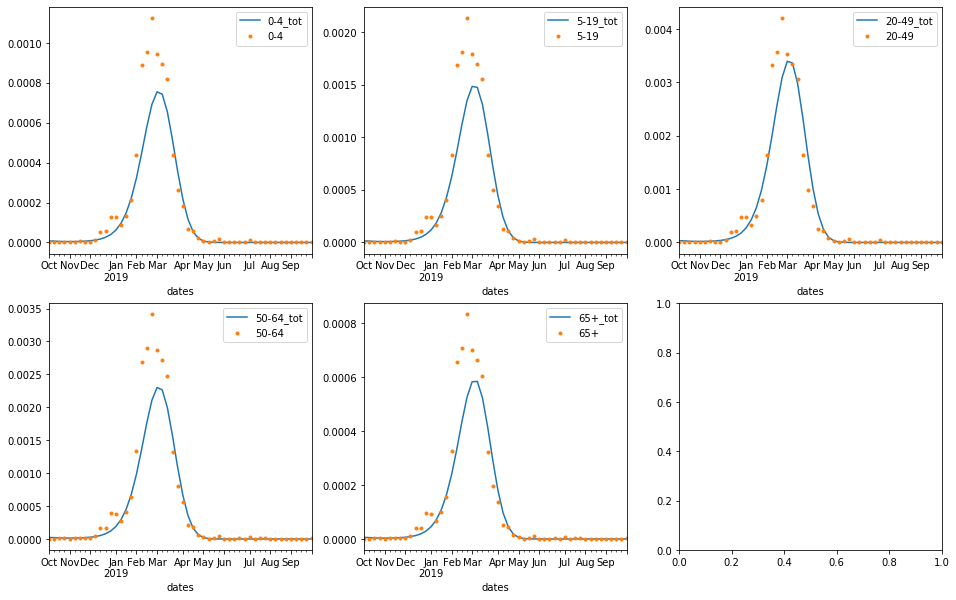

In [9]:
res_mdl = model.run_model([0.0028]+[0.00169]*2+[0.0028,0.0021],0.083*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])




# plotting the data and model
calibrate_mdl = model.model_infected_symp_cases(res_mdl,dates_19,2019)
model.plot_calibrated_model(va_19,calibrate_mdl)

## Calibration by season

### 2015

minimized value: -14.21417458992799
fitted parameters: Beta=[0.00317206 0.00150315 0.00288561 0.00205072], Phi=44.862288334122375
num of sampling the target function: 189
MSE: 6.712161706548625e-07


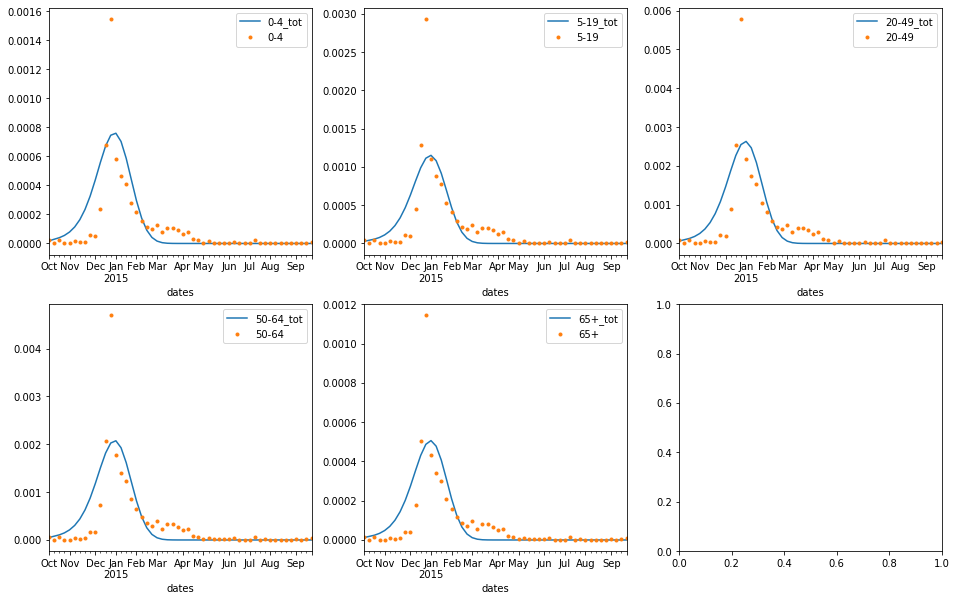

In [10]:
#fitting season 2015:
# Model Fitting
p0=(0.0027,0.0016,0.0027,0.002,0.077) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.001,0.017))# boundries for variables
res_fit_15= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=( dates_15,va_15,'Virginia',2015)
                           ,options={'maxiter':1000})

fitted_params_15 = res_fit_15.x

# run the fitted model:
fitted_beta_15 = np.array([fitted_params_15[0],fitted_params_15[1],fitted_params_15[1],fitted_params_15[2],
                           fitted_params_15[3]])
fitted_phi_15 = fitted_params_15[4]
res_mdl_15 = model.run_model(fitted_beta_15,fitted_phi_15*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_15)
calibrate_mdl_15 = model.model_infected_symp_cases(res_mdl_15,dates_15,2015)
model.plot_calibrated_model(va_15,calibrate_mdl_15)

### 2016

minimized value: -15.766808136248061
fitted parameters: Beta=[0.00313931 0.00159561 0.00300974 0.00218252], Phi=107.50145988402292
num of sampling the target function: 211
MSE: 1.4208957956318446e-07


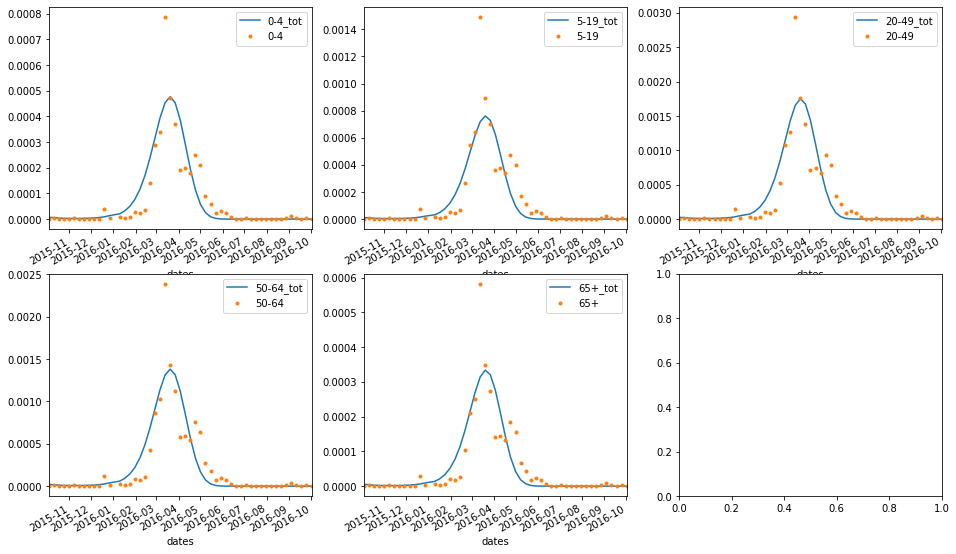

In [11]:
#fitting season 2016:
# Model Fitting
p0=(0.0027,0.00169,0.0027,0.002,0.084) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_16= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_16,va_16,'Virginia',2016)
                           ,options={'maxiter':2000})

fitted_params_16 = res_fit_16.x

# run the fitted model:
fitted_beta_16 = np.array([fitted_params_16[0],fitted_params_16[1],fitted_params_16[1],fitted_params_16[2],
                           fitted_params_16[3]])
fitted_phi_16 = fitted_params_16[4]
res_mdl_16 = model.run_model(fitted_beta_16,fitted_phi_16*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_16)
calibrate_mdl_16 = model.model_infected_symp_cases(res_mdl_16,dates_16,2016)
model.plot_calibrated_model(va_16,calibrate_mdl_16)

### 2017

minimized value: -14.445562588820897
fitted parameters: Beta=[0.00322625 0.00159212 0.00309963 0.00211972], Phi=95.98354510301772
num of sampling the target function: 198
MSE: 5.325640905201672e-07


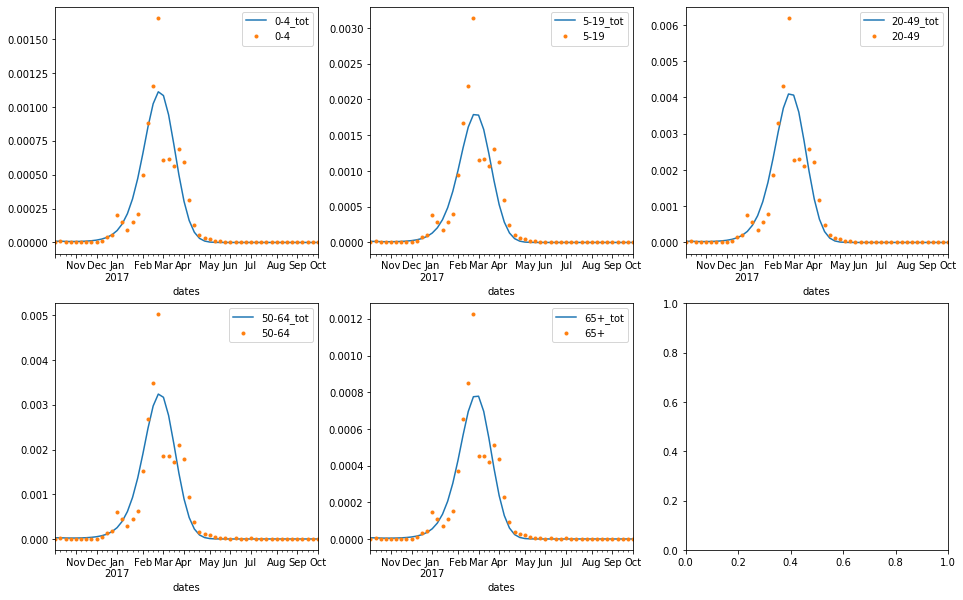

In [12]:
#fitting season 2017:
# Model Fitting
p0=(0.0027,0.00169,0.0027,0.002,0.082) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.005,0.017))# boundries for variables
res_fit_17= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_17,va_17,'Virginia',2017)
                           ,options={'maxiter':3000})

fitted_params_17 = res_fit_17.x

# run the fitted model:
fitted_beta_17 = np.array([fitted_params_17[0],fitted_params_17[1],fitted_params_17[1],fitted_params_17[2],
                           fitted_params_17[3]])
fitted_phi_17 = fitted_params_17[4]
res_mdl_17 = model.run_model(fitted_beta_17,fitted_phi_17*10**(4),1e-4,1e-4,
                          population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_17)
calibrate_mdl_17 = model.model_infected_symp_cases(res_mdl_17,dates_17,2017)
model.plot_calibrated_model(va_17,calibrate_mdl_17)

### 2018

minimized value: -14.403180216574265
fitted parameters: Beta=[0.00355473 0.00156942 0.00318414 0.0020348 ], Phi=84.53973378462399
num of sampling the target function: 230
MSE: 5.556205628542394e-07


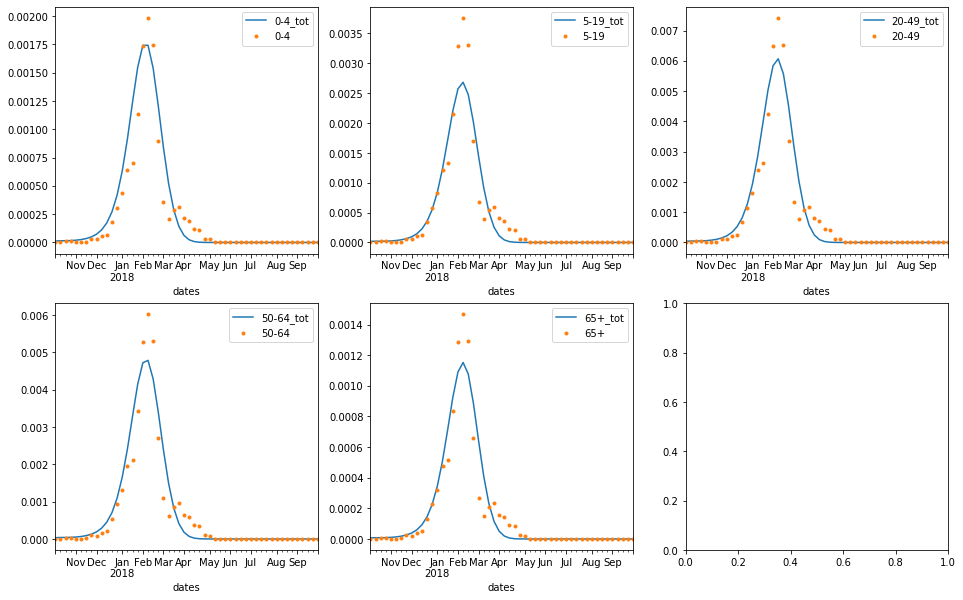

In [13]:
#fitting season 2018:
# Model Fitting
p0=(0.0028,0.00171,0.0028,0.0021,0.0815) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.004,0.017))# boundries for variables
res_fit_18= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_18,va_18,'Virginia',2018)
                           ,options={'maxiter':1000})

fitted_params_18 = res_fit_18.x

# run the fitted model:
fitted_beta_18 = np.array([fitted_params_18[0],fitted_params_18[1],fitted_params_18[1],fitted_params_18[2],
                        fitted_params_18[3]])
fitted_phi_18 = fitted_params_18[4]
res_mdl_18 = model.run_model(fitted_beta_18,fitted_phi_18*10**(4),1e-4,1e-4,
                             population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_18)
calibrate_mdl_18 = model.model_infected_symp_cases(res_mdl_18,dates_18,2018)
model.plot_calibrated_model(va_18,calibrate_mdl_18)

### 2019

minimized value: -16.302562994794165
fitted parameters: Beta=[0.00325493 0.00159064 0.00309283 0.00212889], Phi=96.90432900694749
num of sampling the target function: 274
MSE: 8.315470945944397e-08


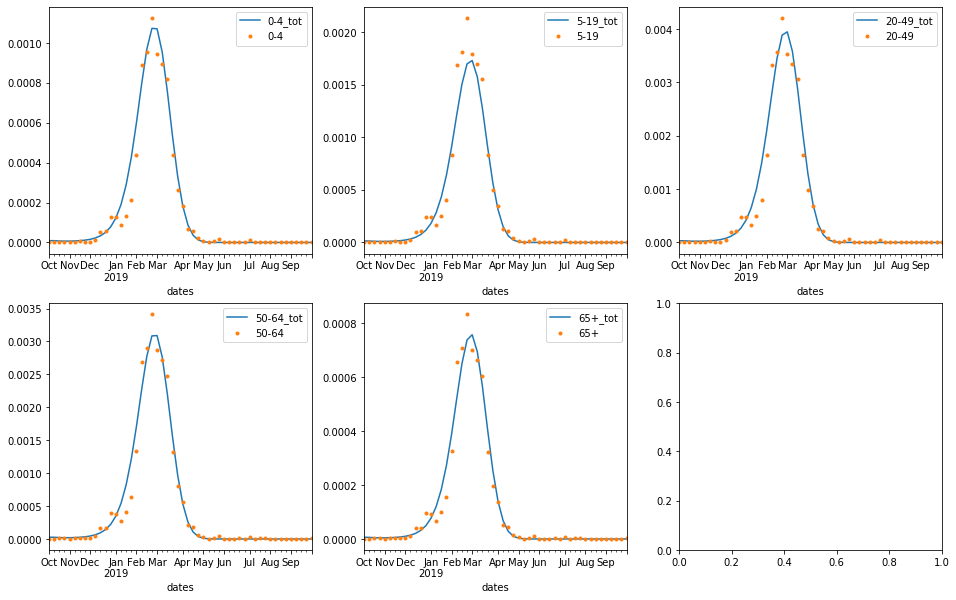

In [14]:
#fitting season 2019:
# Model Fitting
p0=(0.0028,0.00169,0.0028,0.0021,0.083) # initial guess
bnds = ((0,0.1),(0,0.1),(0,0.1),(0,0.1),(0.002,0.017))# boundries for variables
res_fit_19= optimize.minimize(errorfunc,p0,bounds=bnds,method='TNC',args=(dates_19,va_19,'Virginia',2019)
                           ,options={'maxiter':500})

fitted_params_19 = res_fit_19.x

# run the fitted model:
fitted_beta_19 = np.array([fitted_params_19[0],fitted_params_19[1],fitted_params_19[1],fitted_params_19[2],
                        fitted_params_19[3]])
fitted_phi_19 = fitted_params_19[4]
res_mdl_19 = model.run_model(fitted_beta_19,fitted_phi_19*10**(4),1e-4,1e-4,
                             population_size=model.population_size['Virginia'],
                vaccination_coverage=model.vaccination_coverage['US'])

# plotting the data and model
print_stat_fit(res_fit_19)
calibrate_mdl_19 = model.model_infected_symp_cases(res_mdl_19,dates_19,2019)
model.plot_calibrated_model(va_19,calibrate_mdl_19)

# Saving calibration data

In [15]:
# Saving fitted parameters for VA
VA_fitted_params = {}
VA_fitted_params['2015'] = {'beta': fitted_beta_15, 'phi': fitted_phi_15}
VA_fitted_params['2016'] = {'beta': fitted_beta_16, 'phi': fitted_phi_16}
VA_fitted_params['2017'] = {'beta': fitted_beta_17, 'phi': fitted_phi_17}
VA_fitted_params['2018'] = {'beta': fitted_beta_18, 'phi': fitted_phi_18}
VA_fitted_params['2019'] = {'beta': fitted_beta_19, 'phi': fitted_phi_19}

with open('./model_data/VA_fitted_parameters.pickle', 'wb') as handle:
    pickle.dump(VA_fitted_params, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [16]:
# Getting the attack rate for each age group, model and data
df_model_AR_va = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_AR_15 = model.model_attack_rate(calibrate_mdl_15,'Virginia')
mdl_AR_15['season'] = 2015

mdl_AR_16 = model.model_attack_rate(calibrate_mdl_16,'Virginia')
mdl_AR_16['season'] = 2016

mdl_AR_17 = model.model_attack_rate(calibrate_mdl_17,'Virginia')
mdl_AR_17['season'] = 2017

mdl_AR_18 = model.model_attack_rate(calibrate_mdl_18,'Virginia')
mdl_AR_18['season'] = 2018

mdl_AR_19 = model.model_attack_rate(calibrate_mdl_19,'Virginia')
mdl_AR_19['season'] = 2019

for mdl_AR in [mdl_AR_15,mdl_AR_16,mdl_AR_17,mdl_AR_18,mdl_AR_19]:
    df_model_AR_va = df_model_AR_va.append(mdl_AR, ignore_index=True)

with open('./model_data/VA_model_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_model_AR_va, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [17]:
# Getting the attack rate for each age group, model and data
df_data_AR_va = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_AR_15 = model.get_data_attack_rate(va_15,'Virginia')
dt_AR_15['season'] = 2015

dt_AR_16 = model.get_data_attack_rate(va_16,'Virginia')
dt_AR_16['season'] = 2016

dt_AR_17 = model.get_data_attack_rate(va_17,'Virginia')
dt_AR_17['season'] = 2017

dt_AR_18 = model.get_data_attack_rate(va_18,'Virginia')
dt_AR_18['season'] = 2018

dt_AR_19 = model.get_data_attack_rate(va_19,'Virginia')
dt_AR_19['season'] = 2019

for dt_AR in [dt_AR_15,dt_AR_16,dt_AR_17,dt_AR_18,dt_AR_19]:
    df_data_AR_va = df_data_AR_va.append(dt_AR, ignore_index=True)

with open('./model_data/VA_data_attackrate.pickle', 'wb') as handle:
    pickle.dump(df_data_AR_va, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [18]:
# Proportion Model
# Getting the attack rate for each age group, model and data
df_model_Pr_va = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

mdl_Pr_15 = model.model_proportion(calibrate_mdl_15)
mdl_Pr_15['season'] = 2015

mdl_Pr_16 = model.model_proportion(calibrate_mdl_16)
mdl_Pr_16['season'] = 2016

mdl_Pr_17 = model.model_proportion(calibrate_mdl_17)
mdl_Pr_17['season'] = 2017

mdl_Pr_18 = model.model_proportion(calibrate_mdl_18)
mdl_Pr_18['season'] = 2018

mdl_Pr_19 = model.model_proportion(calibrate_mdl_19)
mdl_Pr_19['season'] = 2019

for mdl_Pr in [mdl_Pr_15,mdl_Pr_16,mdl_Pr_17,mdl_Pr_18,mdl_Pr_19]:
    df_model_Pr_va = df_model_Pr_va.append(mdl_Pr, ignore_index=True)

with open('./model_data/VA_model_proportion.pickle', 'wb') as handle:
    pickle.dump(df_model_Pr_va, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [19]:
# Proportion Data

df_data_PR_va = pd.DataFrame(columns = ['season','0-4', '5-19', '20-49', '50-64', '65+'])

dt_Pr_15 = model.get_data_proportion(va_15)
dt_Pr_15['season'] = 2015

dt_Pr_16 = model.get_data_proportion(va_16)
dt_Pr_16['season'] = 2016

dt_Pr_17 = model.get_data_proportion(va_17)
dt_Pr_17['season'] = 2017

dt_Pr_18 = model.get_data_proportion(va_18)
dt_Pr_18['season'] = 2018

dt_Pr_19 = model.get_data_proportion(va_19)
dt_Pr_19['season'] = 2019

for dt_Pr in [dt_Pr_15,dt_Pr_16,dt_Pr_17,dt_Pr_18,dt_Pr_19]:
    df_data_PR_va = df_data_PR_va.append(dt_Pr, ignore_index=True)

with open('./model_data/VA_data_proportion.pickle', 'wb') as handle:
    pickle.dump(df_data_PR_va, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [20]:
# Getting data for fitting figure:
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_16)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_17)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_18)
calibrate_mdl_15 = calibrate_mdl_15.append(calibrate_mdl_19)

with open('./model_data/VA_mdl_fitting_res.pickle', 'wb') as handle:
    pickle.dump(calibrate_mdl_15, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [21]:
# Getting data for fitting figure:
va_15 = va_15.append(va_16)
va_15 = va_15.append(va_17)
va_15 = va_15.append(va_18)
va_15 = va_15.append(va_19)

with open('./model_data/VA_data_fitting_res.pickle', 'wb') as handle:
    pickle.dump(va_15, handle, protocol=pickle.HIGHEST_PROTOCOL)